In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    ## 这里的clf可以就看做是一个svm分类器
    ## 获取一个线性核的情况下的参数系数值
    w = clf.coef_[0]
    a = -w[0] / w[1]
    ## 产生随机的x的值
    xx = np.linspace(min_x - 5, max_x + 5)
    ## 计算y值
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

In [4]:
## 进行模型训练及图表展示
def plot_subfigure(X, Y, subplot, title, transform):
    ## 进行特征降维
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    ## 多分类使用OneVsRestClassifier进行多个目标的分类问题的专门算法API
    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)
    
    print (title,"准确率:", classif.score(X, Y))

    ## 画图
    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    ## 画出所有样本点，大小40，颜色灰色
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    ## 画出类别1的数据
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label=u'类别1')
    ## 画出类别2的数据
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label=u'类别2')

    ## 画出分割线（并获取对应类别的决策/预测估计函数）
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--', u'类别1边界')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'r-.', u'类别2边界')
    
    ## 设置没有坐标轴内容
    plt.xticks(())
    plt.yticks(())

    ## 设置取值范围
    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 4:
        ## 最后一个图表进行label展示
        plt.xlabel(u'第一主成分析')
        plt.ylabel(u'第二主成分析')
        plt.legend(loc="lower right")

包含不确定类别样本数据 + CCA 准确率: 0.9
包含不确定类别样本数据 + PCA 准确率: 0.74
不包含不确定类别样本数据 + CCA 准确率: 0.98
不包含不确定类别样本数据 + PCA 准确率: 0.94


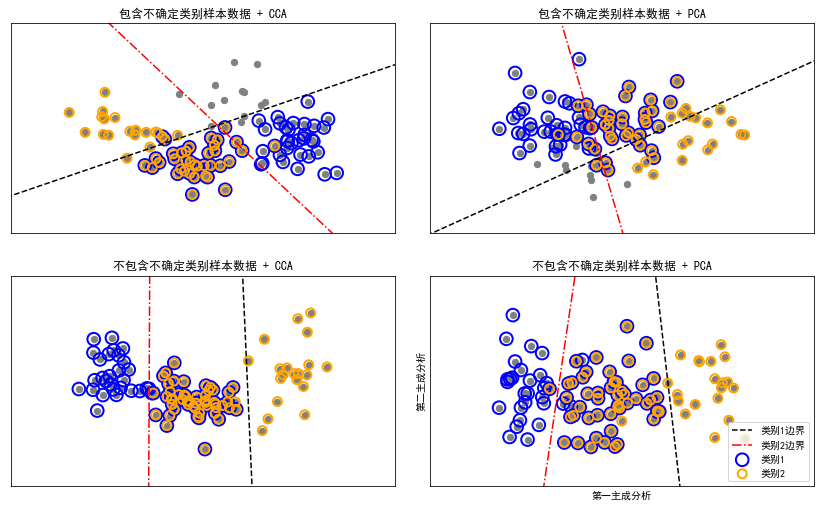

In [5]:
plt.figure(figsize=(12, 7), facecolor='w')

## 产生一个多分类问题的原始数据，样本数量100，特征属性30，预测类别两个，每个类别的label数为2，允许存在不属于任何类别的示例
X, Y = make_multilabel_classification(n_samples=100, n_features=30,
                                      n_classes=2, n_labels=2,
                                      allow_unlabeled=True,
                                      return_indicator=True,
                                      random_state=28)

## 进行模型训练及数据展示
plot_subfigure(X, Y, 1, u"包含不确定类别样本数据 + CCA", "cca")
plot_subfigure(X, Y, 2, u"包含不确定类别样本数据 + PCA", "pca")

## 产生一个多分类问题的原始数据，样本数量100，特征属性30，预测类别两个，每个类别的label数为2，不允许存在不属于任何类别的示例
X, Y = make_multilabel_classification(n_samples=100,  n_features=30,
                                      n_classes=2, n_labels=2,
                                      allow_unlabeled=False,
                                      return_indicator=True,
                                      random_state=28)
## 进行模型训练及数据展示
plot_subfigure(X, Y, 3, u"不包含不确定类别样本数据 + CCA", "cca")
plot_subfigure(X, Y, 4, u"不包含不确定类别样本数据 + PCA", "pca")

## 图表展示
plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()